In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('/workspaces/Data-Analyst-Project-Portfolio/airbnb_pricing_demand/data/airbnb_listings_cleaned.csv')
print("Data Shape:", df.info)

Data Shape: <bound method DataFrame.info of               city neighbourhood property_type        room_type   price  \
0    San Francisco   City Center   Condominium  Entire home/apt  179.94   
1           Boston      Downtown     Apartment     Private room  230.65   
2          Chicago   City Center          Loft      Shared room  415.40   
3    San Francisco      Downtown     Townhouse     Private room  432.96   
4          Chicago    Waterfront     Apartment  Entire home/apt  551.43   
..             ...           ...           ...              ...     ...   
115  San Francisco   City Center         House      Shared room  528.53   
116         Boston      Downtown         House      Shared room  399.68   
117         Boston       Suburbs          Loft      Shared room  488.72   
118        Chicago      Downtown   Condominium     Private room  372.36   
119  San Francisco    Waterfront     Apartment  Entire home/apt  145.24   

     minimum_nights  number_of_reviews  review_score  a

In [3]:
features = ['room_type', 'property_type', 'minimum_nights', 'availability_365',
            'number_of_reviews', 'review_score', 'host_years', 'city']
target = 'price'

In [4]:
df_model = df[features + [target]].dropna()
print("Model Data Shape:", df_model.shape)

Model Data Shape: (120, 9)


In [5]:
X = df_model[features]
y = df_model[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
numeric_features = ['minimum_nights', 'availability_365', 'number_of_reviews',
                    'review_score', 'host_years']
categorical_features = ['room_type', 'property_type', 'city']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [8]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [9]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌳 Random Forest Results")
print(f"MAE: ${mae_rf:.2f}")
print(f"R²: {r2_rf:.3f}")

🌳 Random Forest Results
MAE: $160.72
R²: -0.269


In [10]:
lr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n📈 Linear Regression Results")
print(f"MAE: ${mae_lr:.2f}")
print(f"R²: {r2_lr:.3f}")


📈 Linear Regression Results
MAE: $166.37
R²: -0.382


In [12]:
import matplotlib.pyplot as plt

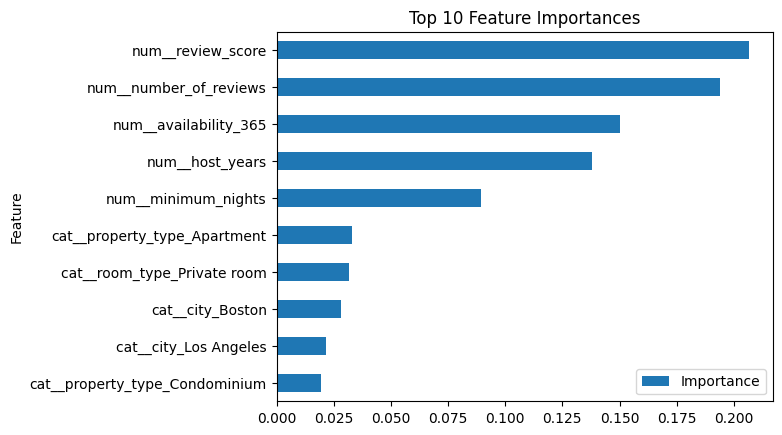

In [13]:
importances = rf_pipeline.named_steps['model'].feature_importances_
feature_names = rf_pipeline.named_steps['preprocess'].get_feature_names_out()

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_df.head(10).plot(x='Feature', y='Importance', kind='barh', title='Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()
